In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | thompson
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | siocon
Processing Record 6 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 1 | cherskiy
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | miami
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | bismarck
Processing Record 14 of Set 1 | alofi
Processing Record 15 of Set 1 | billings
Processing Record 16 of Set 1 | port-gentil
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | gorele
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | thinadhoo
Processing Record 21 of Set 1 | ostrovnoy
Processing Record 22 of Set 1 | kodiak
Processing Record 2

Processing Record 40 of Set 4 | dinguiraye
Processing Record 41 of Set 4 | luanda
Processing Record 42 of Set 4 | atasu
Processing Record 43 of Set 4 | satipo
Processing Record 44 of Set 4 | comrat
Processing Record 45 of Set 4 | desenzano del garda
Processing Record 46 of Set 4 | casino
Processing Record 47 of Set 4 | matara
Processing Record 48 of Set 4 | rafraf
Processing Record 49 of Set 4 | san patricio
Processing Record 50 of Set 4 | riviere-du-loup
Processing Record 1 of Set 5 | santiago
Processing Record 2 of Set 5 | arroyo
Processing Record 3 of Set 5 | mujiayingzi
Processing Record 4 of Set 5 | brahmapuri
City not found. Skipping...
Processing Record 5 of Set 5 | kano
Processing Record 6 of Set 5 | bathsheba
Processing Record 7 of Set 5 | sorland
Processing Record 8 of Set 5 | nalgonda
Processing Record 9 of Set 5 | kieta
Processing Record 10 of Set 5 | kaitangata
Processing Record 11 of Set 5 | port lincoln
Processing Record 12 of Set 5 | borogontsy
Processing Record 13 of S

Processing Record 26 of Set 8 | uetze
Processing Record 27 of Set 8 | tarija
Processing Record 28 of Set 8 | jumla
Processing Record 29 of Set 8 | san blas
Processing Record 30 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 31 of Set 8 | la union
Processing Record 32 of Set 8 | hengshan
Processing Record 33 of Set 8 | vardo
Processing Record 34 of Set 8 | am timan
Processing Record 35 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 36 of Set 8 | port angeles
Processing Record 37 of Set 8 | kharp
Processing Record 38 of Set 8 | warrington
Processing Record 39 of Set 8 | eureka
Processing Record 40 of Set 8 | marsaxlokk
Processing Record 41 of Set 8 | abu samrah
Processing Record 42 of Set 8 | caravelas
Processing Record 43 of Set 8 | plainview
Processing Record 44 of Set 8 | huainan
Processing Record 45 of Set 8 | khandyga
Processing Record 46 of Set 8 | habiganj
Processing Record 47 of Set 8 | baturaja
Processing Record 48 of Set 8 | shenjiamen
Processing 

Processing Record 17 of Set 12 | cape coast
Processing Record 18 of Set 12 | sao miguel do araguaia
Processing Record 19 of Set 12 | puerto carreno
Processing Record 20 of Set 12 | vysokogornyy
Processing Record 21 of Set 12 | ishigaki
Processing Record 22 of Set 12 | salalah
Processing Record 23 of Set 12 | abha
Processing Record 24 of Set 12 | nouadhibou
Processing Record 25 of Set 12 | esmeraldas
Processing Record 26 of Set 12 | kuchera
Processing Record 27 of Set 12 | kasongo-lunda
Processing Record 28 of Set 12 | panzhihua
Processing Record 29 of Set 12 | san angelo
Processing Record 30 of Set 12 | hovin
Processing Record 31 of Set 12 | mount isa
Processing Record 32 of Set 12 | quimper
Processing Record 33 of Set 12 | lasa
Processing Record 34 of Set 12 | chilliwack
Processing Record 35 of Set 12 | oudtshoorn
Processing Record 36 of Set 12 | saint-francois
Processing Record 37 of Set 12 | pouembout
Processing Record 38 of Set 12 | lata
Processing Record 39 of Set 12 | ondorhaan
C

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,56.48,90,100,1.30,NZ,2021-12-02 13:04:40
1,Thompson,55.7435,-97.8558,-11.60,92,100,3.78,CA,2021-12-02 13:04:34
2,Talnakh,69.4865,88.3972,-5.80,94,100,5.70,RU,2021-12-02 13:06:43
3,Ushuaia,-54.8000,-68.3000,51.46,46,20,14.97,AR,2021-12-02 13:05:53
4,Siocon,7.7061,122.1353,80.31,86,100,3.20,PH,2021-12-02 13:06:43
5,Cherskiy,68.7500,161.3000,-22.77,90,100,5.88,RU,2021-12-02 13:06:01
6,Saint-Philippe,-21.3585,55.7679,83.75,82,38,13.98,RE,2021-12-02 13:04:50
7,Busselton,-33.6500,115.3333,60.08,66,0,21.03,AU,2021-12-02 13:04:47
8,Hamilton,39.1834,-84.5333,51.57,91,1,1.99,US,2021-12-02 13:06:44
9,Miami,25.7743,-80.1937,68.02,90,1,0.00,US,2021-12-02 13:05:48


In [11]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
city_data_df = city_data_df[new_column_order]

In [13]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-12-02 13:04:40,-46.1927,168.8643,56.48,90,100,1.30
1,Thompson,CA,2021-12-02 13:04:34,55.7435,-97.8558,-11.60,92,100,3.78
2,Talnakh,RU,2021-12-02 13:06:43,69.4865,88.3972,-5.80,94,100,5.70
3,Ushuaia,AR,2021-12-02 13:05:53,-54.8000,-68.3000,51.46,46,20,14.97
4,Siocon,PH,2021-12-02 13:06:43,7.7061,122.1353,80.31,86,100,3.20
5,Cherskiy,RU,2021-12-02 13:06:01,68.7500,161.3000,-22.77,90,100,5.88
6,Saint-Philippe,RE,2021-12-02 13:04:50,-21.3585,55.7679,83.75,82,38,13.98
7,Busselton,AU,2021-12-02 13:04:47,-33.6500,115.3333,60.08,66,0,21.03
8,Hamilton,US,2021-12-02 13:06:44,39.1834,-84.5333,51.57,91,1,1.99
9,Miami,US,2021-12-02 13:05:48,25.7743,-80.1937,68.02,90,1,0.00


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

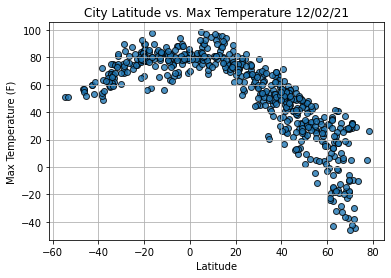

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

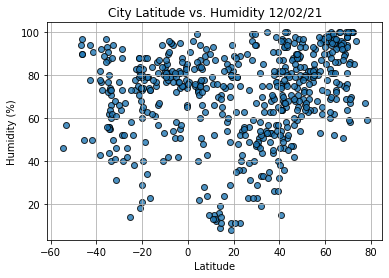

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

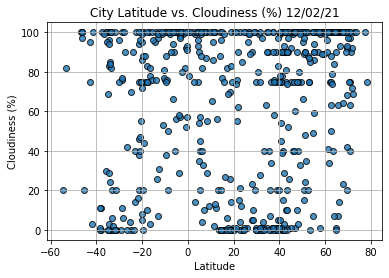

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

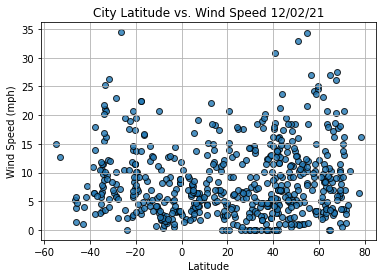

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City                     Billings
Country                        US
Date          2021-12-02 13:06:13
Lat                       45.7833
Lng                     -108.5007
Max Temp                    57.51
Humidity                       47
Cloudiness                     40
Wind Speed                  19.57
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4       True
       ...  
567    False
568     True
569    False
570     True
571    False
Name: Lat, Length: 572, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Thompson,CA,2021-12-02 13:04:34,55.7435,-97.8558,-11.60,92,100,3.78
2,Talnakh,RU,2021-12-02 13:06:43,69.4865,88.3972,-5.80,94,100,5.70
4,Siocon,PH,2021-12-02 13:06:43,7.7061,122.1353,80.31,86,100,3.20
5,Cherskiy,RU,2021-12-02 13:06:01,68.7500,161.3000,-22.77,90,100,5.88
8,Hamilton,US,2021-12-02 13:06:44,39.1834,-84.5333,51.57,91,1,1.99


In [24]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

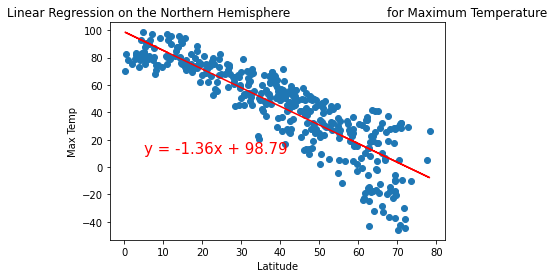

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,10))

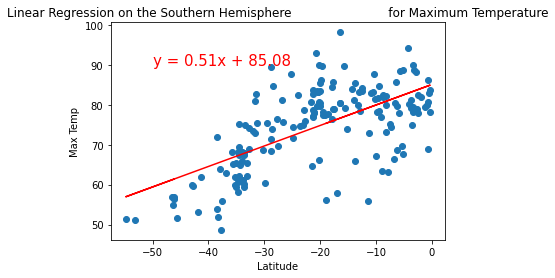

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

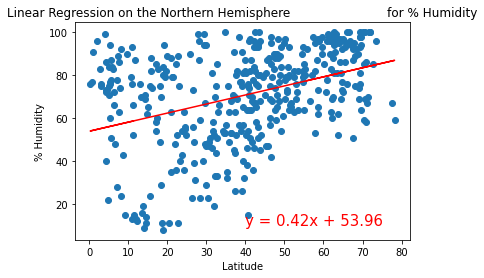

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

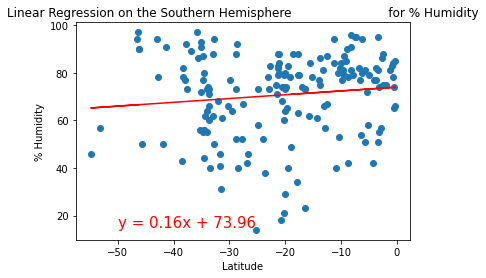

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

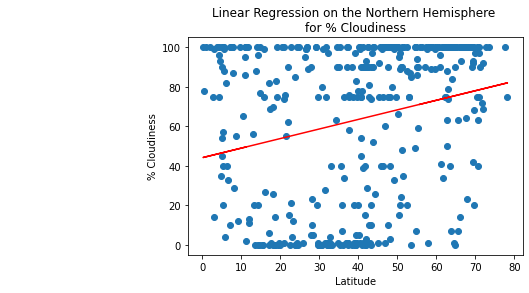

In [29]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

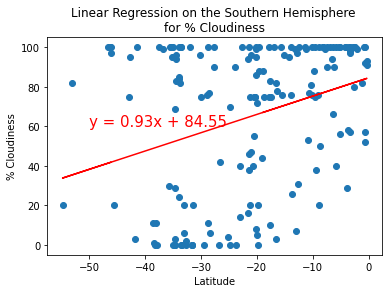

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,60))

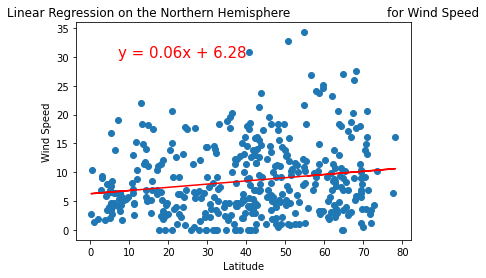

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(7,30))

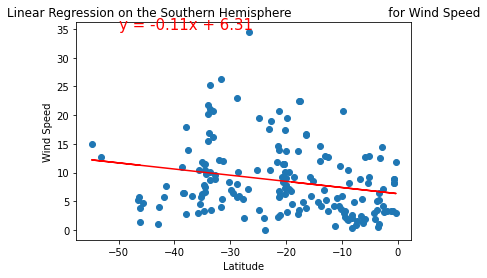

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))